In [2]:
# pip install statsmodels

  Using cached statsmodels-0.13.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.9 MB)
  Using cached patsy-0.5.2-py2.py3-none-any.whl (233 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd                         
import statsmodels.api as sm               
import statsmodels.formula.api as smf      
import matplotlib.pyplot as plt 

#Link de Interés: https://www.statsmodels.org/devel/

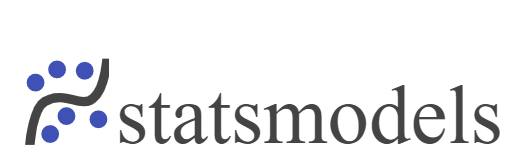

statsmodels es un módulo de Python que proporciona clases y funciones para la estimación de muchos modelos estadísticos diferentes, así como para realizar pruebas estadísticas y exploración de datos estadísticos.

In [6]:
#Carga de datos
file = 'https://raw.githubusercontent.com/fhernanb/Python-para-estadistica/master/03%20Regression/Regresi%C3%B3n%20lineal%20simple/softdrink.csv'
df = pd.read_csv(file)

In [7]:
#Vemos nuestros datos
df.head()   

,Obs,y,x1,x2
0,1,16.68,7,560
1,2,11.50,3,220
2,3,12.03,3,340
3,4,14.88,4,80
4,5,13.75,6,150


<AxesSubplot:xlabel='x1', ylabel='y'>

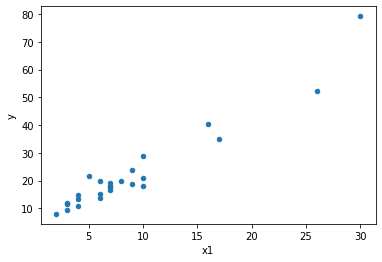

In [8]:
#Scatterplot
df.plot(kind='scatter', x='x1', y='y')

In [9]:
#Creacion del modelo con statsmodels.api.

X = df["x1"] # X: variables independientes
X = sm.add_constant(X)# Se agrega una intercepción (beta_0) al modelo
y = df["y"] # Y: variable respuesta (o variable dependiente)

# Fiteamos el modelo
mod1 = sm.OLS(y, X).fit()   
predictions = mod1.predict(X)

In [10]:
#Estadisticas del modelo
mod1.summary()   

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     307.8
Date:                Sun, 10 Jul 2022   Prob (F-statistic):           8.22e-15
Time:                        21:48:30   Log-Likelihood:                -70.197
No. Observations:                  25   AIC:                             144.4
Df Residuals:                      23   BIC:                             146.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3208      1.371      2.422      0.024       0.484       6.157
x1             2.1762      0.124     17.546      0.000       1.920       2.433
==============================================================================
Omnibus:                        2.383   Durbin-Watson:                   0.946
Prob(Omnibus):                  0.304   Jarque-Bera (JB):                1.037
Skew:                           0.388   Prob(JB):                        0.595
Kurtosis:                       3.627   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
#Ajuste del modelo - statsmodels.formula.api
mod2 = smf.ols('y ~ x1', data=df).fit()

In [12]:
#Vemos las estadisticas del modelo
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     307.8
Date:                Sun, 10 Jul 2022   Prob (F-statistic):           8.22e-15
Time:                        21:48:34   Log-Likelihood:                -70.197
No. Observations:                  25   AIC:                             144.4
Df Residuals:                      23   BIC:                             146.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3208      1.371      2.422      0.0

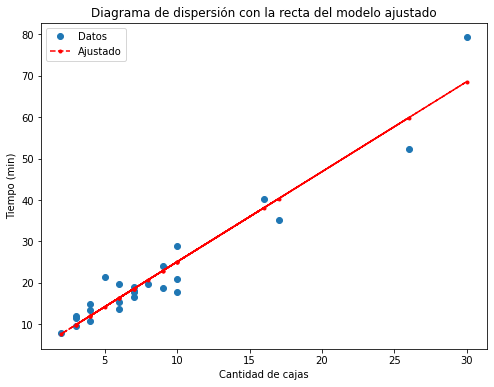

In [14]:
#Recta de regresion estimada
fig, ax = plt.subplots(figsize=(8,6))                                    # Ajuste del gráfico
ax.plot(df["x1"] , df["y"] , 'o', label="Datos")                         # Ajuste para las etiquetas del gráfico
ax.plot(df["x1"], mod2.fittedvalues, 'r--.', label="Ajustado")           # Ajuste para las etiquetas del gráfico
legend = ax.legend(loc="best")                                           # Ajustes para las leyendas del gráfico
plt.xlabel('Cantidad de cajas')                                          # Etiqueta del eje X
plt.ylabel('Tiempo (min)')                                               # Etiqueta del eje Y
plt.title('Diagrama de dispersión con la recta del modelo ajustado');    # Título del gráfico